In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from gensim.models import Word2Vec

In [2]:
df=pd.read_csv('C:\\Users\\krishna\\Downloads\\Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

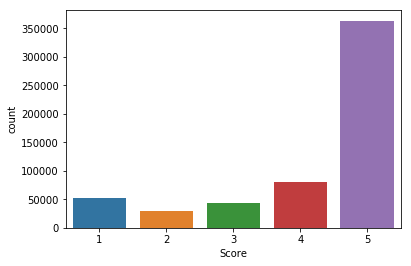

In [5]:
sns.countplot(df['Score'])

In [6]:

# Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.
def partition(x):
    if x < 3:
        return 0
    return 1

In [7]:
#changing reviews with score less than 3 to be negative and vice-versa
actualScore = df['Score']
positiveNegative = actualScore.map(partition) 
df['Score'] = positiveNegative
print("Number of data points in our data", df.shape)
df.head(3)

Number of data points in our data (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [8]:
df1=df.head(10000)

In [9]:
df2=df1.drop_duplicates(subset=['Id','ProductId','ProfileName','Time','Score','Text'])

In [10]:
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df2.shape

(10000, 10)

In [12]:
df3=df2[df2['HelpfulnessNumerator']<=df2['HelpfulnessDenominator']]

In [13]:
df3['Score'].value_counts()

1    8478
0    1522
Name: Score, dtype: int64

# text preprocessing

In [14]:
df_X = df3['Text']
df_y = df3['Score']

In [15]:
stop = set(stopwords.words('english')) 
print(stop)

{"shan't", 'doesn', 'hadn', "you'll", 'o', "didn't", 'than', 'has', 'shouldn', 'because', 'couldn', 'didn', 'further', 'm', 'this', 'he', 'theirs', 'am', 'from', 't', 'some', "you've", 'between', 'we', 'him', 'do', 'ourselves', 'down', 'how', 'through', 'on', 'such', 'these', 'both', 'have', "weren't", 'his', 'in', 'above', 'itself', 'which', 'isn', 'very', 'they', 'doing', 'd', "don't", 'what', 'are', 'a', "doesn't", 'during', 'only', 'wasn', 'whom', 'and', 'against', 'below', 'all', 'if', 'other', 'each', "mightn't", 'our', 'any', 'that', "shouldn't", 'needn', 'its', 've', 'hers', 'until', 'be', 'having', 'wouldn', 'why', 'up', 'under', 'she', "hadn't", 'will', 'over', 'but', 'same', 'while', 'mustn', 'them', 'once', 's', 'my', 'don', 'of', 'i', 'those', 'y', 'herself', 'who', 'again', 'most', 'nor', 'themselves', "should've", "it's", "wasn't", "you're", 'does', 'own', 'hasn', 'their', 'should', 'aren', 'ain', 'by', "couldn't", 'had', 'before', 'your', "won't", 'no', 'yours', 'or', '

In [16]:
import re

# BAG OF WORDS

In [17]:
temp =[]
snow = nltk.stem.SnowballStemmer('english')
for sentence in df_X:
    sentence = sentence.lower()   
    #convertinging to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
    temp.append(words)
    
df_X = temp    

In [18]:
print(df_X[1])

['product', 'arriv', 'label', 'jumbo', 'salt', 'peanut', 'peanut', 'actual', 'small', 'size', 'unsalt', 'sure', 'error', 'vendor', 'intend', 'repres', 'product', 'jumbo']


In [19]:
sent = []
for row in df_X:
    sequ = ''
    for word in row:
        sequ = sequ + ' ' + word
    sent.append(sequ)

df_X = sent
print(df_X[1])

 product arriv label jumbo salt peanut peanut actual small size unsalt sure error vendor intend repres product jumbo


# BINARY BAG OF WORDS

In [20]:
count_vect = CountVectorizer(max_features=5000)
bow_data = count_vect.fit_transform(df_X)
print(bow_data[1])

  (0, 3651)	1
  (0, 2340)	1
  (0, 4730)	1
  (0, 1538)	1
  (0, 4315)	1
  (0, 4672)	1
  (0, 3984)	1
  (0, 4021)	1
  (0, 164)	1
  (0, 3228)	2
  (0, 3779)	1
  (0, 2429)	2
  (0, 2498)	1
  (0, 333)	1
  (0, 3441)	2


# BI-GRAM BOW

In [21]:
df_B_X = df_X

In [22]:
count_vect = CountVectorizer(ngram_range=(1,2))
Bigram_data = count_vect.fit_transform(df_B_X)
print(Bigram_data[1])

  (0, 155132)	1
  (0, 164349)	1
  (0, 102952)	1
  (0, 213144)	1
  (0, 66027)	1
  (0, 192054)	1
  (0, 209826)	1
  (0, 178486)	1
  (0, 179474)	1
  (0, 4431)	1
  (0, 145033)	1
  (0, 145079)	1
  (0, 169020)	1
  (0, 105996)	1
  (0, 108824)	1
  (0, 12959)	1
  (0, 154737)	1
  (0, 164341)	1
  (0, 102936)	1
  (0, 213127)	1
  (0, 66013)	1
  (0, 191974)	1
  (0, 209817)	1
  (0, 178220)	1
  (0, 179252)	1
  (0, 4224)	1
  (0, 145032)	2
  (0, 168871)	1
  (0, 105990)	2
  (0, 108757)	1
  (0, 12876)	1
  (0, 154681)	2


# TF-IDF

In [23]:
df_tf = df_X
tf_idf = TfidfVectorizer(max_features=5000)
tf_data = tf_idf.fit_transform(df_tf)
print(tf_data[1])

  (0, 3441)	0.18202403814257867
  (0, 333)	0.15673405699699108
  (0, 2498)	0.18332702337658963
  (0, 2429)	0.5721373890087614
  (0, 3779)	0.15408086526397632
  (0, 3228)	0.37467426339124205
  (0, 164)	0.14625267770919553
  (0, 4021)	0.14539428502791302
  (0, 3984)	0.14547147340823857
  (0, 4672)	0.27294106253378553
  (0, 4315)	0.1419427154646107
  (0, 1538)	0.2702954366823277
  (0, 4730)	0.22144851953773764
  (0, 2340)	0.24959614137557432
  (0, 3651)	0.27294106253378553


# Word2Vec

In [24]:
w2v_data = df_X

In [25]:
splitted = []
for row in w2v_data: 
    splitted.append([word for word in row.split()])     #splitting words

In [26]:
train_w2v = Word2Vec(splitted,min_count=5,size=50, workers=4)

In [27]:
avg_data = []
for row in splitted:
    vec = np.zeros(50)
    count = 0
    for word in row:
        try:
            vec += train_w2v[word]
            count += 1
        except:
            pass
    avg_data.append(vec/count)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [28]:
print(avg_data[1])

[ 0.20866474 -0.04804418  0.33953007 -0.16589438 -0.67706675 -0.22344004
  0.10531413  0.21572179  0.44418034 -0.37828587 -0.33229139 -0.52005218
  0.0700564  -0.53940408  0.49824321 -0.028892   -0.21142907 -0.3126281
 -0.11368512 -0.42777478  0.27552921 -0.29041104  0.14805121  0.11626285
  0.24275787 -0.2444412   0.09210719 -0.39878657 -0.03763622 -0.00799167
  0.08234614 -0.08339     0.41415728 -0.10981268 -0.45579088 -0.38102163
  0.00604516 -0.45521933  0.55935653 -0.22000632  0.17639184  0.19813541
  0.34846662  0.19316549 -0.0219252  -0.13574463  0.0985726  -0.06597723
 -0.16895053 -0.11417216]


# TF-IDF WORD2VEC

In [29]:
tf_w_data = df_X
tf_idf = TfidfVectorizer(max_features=5000)
tf_idf_data = tf_idf.fit_transform(tf_w_data)

In [30]:
tf_w_data = []
tf_idf_data = tf_idf_data.toarray()
i = 0
for row in splitted:
    vec = [0 for i in range(50)]
    
    temp_tfidf = []
    for val in tf_idf_data[i]:
        if val != 0:
            temp_tfidf.append(val)
    
    count = 0
    tf_idf_sum = 0
    for word in row:
        try:
            count += 1
            tf_idf_sum = tf_idf_sum + temp_tfidf[count-1]
            vec += (temp_tfidf[count-1] * train_w2v[word])
        except:
            pass
    vec = (float)(1/tf_idf_sum) * vec
    tf_w_data.append(vec)
    i = i + 1

print(tf_w_data[1])
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


[ 0.2975844   0.21111186  0.57845095 -0.20743652 -0.62389627 -0.57621096
 -0.01946516  0.21944995  0.5923039  -0.45637568 -0.43860161 -0.56667612
  0.04603565 -0.47870589  0.44056394 -0.01094492 -0.16896692 -0.26091195
  0.01596791 -0.75692239  0.31792831 -0.42898294  0.31024709 -0.00394529
  0.24000925 -0.17044874  0.36393781 -0.2452906   0.05960905 -0.17497073
  0.00486757  0.03416036  0.62224513 -0.08011683 -0.40631101 -0.56340927
  0.12332889 -0.53438875  0.57580776 -0.24328007  0.22807461 -0.10656332
  0.60506827  0.33586708 -0.18487633 -0.08919621  0.17831639 -0.13048696
 -0.15969985 -0.18222192]


# Sentiment Analysis

In [31]:
from sklearn.model_selection import train_test_split

In [32]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df2['Summary'], 
                                                    df2['Score'], 
                                                    random_state=0)

In [33]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 contains MSG


X_train shape:  (7500,)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [35]:
vect.get_feature_names()[::200]

['00',
 'approved',
 'bolder',
 'charges',
 'cornmeal',
 'digestive',
 'exercise',
 'fry',
 'haven',
 'italy',
 'liver',
 'mm',
 'onions',
 'plated',
 'receiving',
 'seasoned',
 'sound',
 'target',
 'twisted',
 'wife']

In [36]:
len(vect.get_feature_names())

3921

In [37]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<7500x3921 sparse matrix of type '<class 'numpy.int64'>'
	with 28986 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
from sklearn import metrics

In [40]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.6828238587065749


In [41]:
metric_bal=pd.Series([metrics.accuracy_score(y_test, predictions),metrics.precision_score(y_test, predictions,average='weighted',labels= [1]),
              metrics.recall_score(y_test, predictions,average='weighted',labels= [1]),metrics.f1_score(y_test, predictions,average='weighted',labels= [1])],
                     index=['accuracy_score','precision_score','recall_score','f1_score'])
print(metric_bal)
print()
print(metrics.classification_report(y_test, predictions))
print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predictions))

accuracy_score     0.884400
precision_score    0.897603
recall_score       0.974456
f1_score           0.934452
dtype: float64

              precision    recall  f1-score   support

           0       0.74      0.39      0.51       386
           1       0.90      0.97      0.93      2114

    accuracy                           0.88      2500
   macro avg       0.82      0.68      0.72      2500
weighted avg       0.87      0.88      0.87      2500


Confusion Matrix:
[[ 151  235]
 [  54 2060]]


In [42]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.6545629678285891


In [43]:
metric_bal=pd.Series([metrics.accuracy_score(y_test, predictions),metrics.precision_score(y_test, predictions,average='weighted',labels= [1]),
              metrics.recall_score(y_test, predictions,average='weighted',labels= [1]),metrics.f1_score(y_test, predictions,average='weighted',labels= [1])],
                     index=['accuracy_score','precision_score','recall_score','f1_score'])
print(metric_bal)
print()
print(metrics.classification_report(y_test, predictions))
print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predictions))

accuracy_score     0.876000
precision_score    0.889129
recall_score       0.974929
f1_score           0.930054
dtype: float64

              precision    recall  f1-score   support

           0       0.71      0.33      0.45       386
           1       0.89      0.97      0.93      2114

    accuracy                           0.88      2500
   macro avg       0.80      0.65      0.69      2500
weighted avg       0.86      0.88      0.86      2500


Confusion Matrix:
[[ 129  257]
 [  53 2061]]


In [44]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.5725057720305292


In [45]:
metric_bal=pd.Series([metrics.accuracy_score(y_test, predictions),metrics.precision_score(y_test, predictions,average='weighted',labels= [1]),
              metrics.recall_score(y_test, predictions,average='weighted',labels= [1]),metrics.f1_score(y_test, predictions,average='weighted',labels= [1])],
                     index=['accuracy_score','precision_score','recall_score','f1_score'])
print(metric_bal)
print()
print(metrics.classification_report(y_test, predictions))
print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predictions))

accuracy_score     0.857200
precision_score    0.865281
recall_score       0.984390
f1_score           0.921000
dtype: float64

              precision    recall  f1-score   support

           0       0.65      0.16      0.26       386
           1       0.87      0.98      0.92      2114

    accuracy                           0.86      2500
   macro avg       0.76      0.57      0.59      2500
weighted avg       0.83      0.86      0.82      2500


Confusion Matrix:
[[  62  324]
 [  33 2081]]


In [46]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['gun' 'mega' 'cancelled' 'skimpy' 'skim' 'mention' 'cant' 'signature'
 'sickening' 'merchandise']

Largest Coefs: 
['great' 'good' 'the' 'for' 'best' 'and' 'coffee' 'my' 'it' 'love']


# Tfidf

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

810

In [48]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.6309086720163137


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
metric_bal=pd.Series([metrics.accuracy_score(y_test, predictions),metrics.precision_score(y_test, predictions,average='weighted',labels= [1]),
              metrics.recall_score(y_test, predictions,average='weighted',labels= [1]),metrics.f1_score(y_test, predictions,average='weighted',labels= [1])],
                     index=['accuracy_score','precision_score','recall_score','f1_score'])
print(metric_bal)
print()
print(metrics.classification_report(y_test, predictions))
print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predictions))

accuracy_score     0.873600
precision_score    0.881903
recall_score       0.982025
f1_score           0.929275
dtype: float64

              precision    recall  f1-score   support

           0       0.74      0.28      0.41       386
           1       0.88      0.98      0.93      2114

    accuracy                           0.87      2500
   macro avg       0.81      0.63      0.67      2500
weighted avg       0.86      0.87      0.85      2500


Confusion Matrix:
[[ 108  278]
 [  38 2076]]


In [50]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.5970154558065892


In [51]:
metric_bal=pd.Series([metrics.accuracy_score(y_test, predictions),metrics.precision_score(y_test, predictions,average='weighted',labels= [1]),
              metrics.recall_score(y_test, predictions,average='weighted',labels= [1]),metrics.f1_score(y_test, predictions,average='weighted',labels= [1])],
                     index=['accuracy_score','precision_score','recall_score','f1_score'])
print(metric_bal)
print()
print(metrics.classification_report(y_test, predictions))
print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predictions))

accuracy_score     0.870000
precision_score    0.871933
recall_score       0.991958
f1_score           0.928081
dtype: float64

              precision    recall  f1-score   support

           0       0.82      0.20      0.32       386
           1       0.87      0.99      0.93      2114

    accuracy                           0.87      2500
   macro avg       0.85      0.60      0.63      2500
weighted avg       0.86      0.87      0.83      2500


Confusion Matrix:
[[  78  308]
 [  17 2097]]


In [52]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.6826669967304082


In [53]:
metric_bal=pd.Series([metrics.accuracy_score(y_test, predictions),metrics.precision_score(y_test, predictions,average='weighted',labels= [1]),
              metrics.recall_score(y_test, predictions,average='weighted',labels= [1]),metrics.f1_score(y_test, predictions,average='weighted',labels= [1])],
                     index=['accuracy_score','precision_score','recall_score','f1_score'])
print(metric_bal)
print()
print(metrics.classification_report(y_test, predictions))
print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predictions))

accuracy_score     0.871600
precision_score    0.898622
recall_score       0.956008
f1_score           0.926427
dtype: float64

              precision    recall  f1-score   support

           0       0.63      0.41      0.50       386
           1       0.90      0.96      0.93      2114

    accuracy                           0.87      2500
   macro avg       0.76      0.68      0.71      2500
weighted avg       0.86      0.87      0.86      2500


Confusion Matrix:
[[ 158  228]
 [  93 2021]]


In [54]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['ounce' 'wheat' 'dairy' 'getting' 'ate' 'products' 'teeth' 'being' 'feel'
 'once']

Largest tfidf: 
['yummy' 'horrible' 'house' 'huge' 'in' 'interesting' 'is' 'island' 'it'
 'its']


In [55]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['waste' 'disgusting' 'disapointed' 'nasty' 'control' 'warning' 'yuck'
 'yuk' 'horrible' 'sorry']

Largest Coefs: 
['great' 'good' 'the' 'for' 'best' 'and' 'coffee' 'my' 'it' 'love']


# n-grams

In [56]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

1347

In [57]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.6876559428630251


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
metric_bal=pd.Series([metrics.accuracy_score(y_test, predictions),metrics.precision_score(y_test, predictions,average='weighted',labels= [1]),
              metrics.recall_score(y_test, predictions,average='weighted',labels= [1]),metrics.f1_score(y_test, predictions,average='weighted',labels= [1])],
                     index=['accuracy_score','precision_score','recall_score','f1_score'])
print(metric_bal)
print()
print(metrics.classification_report(y_test, predictions))
print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predictions))

accuracy_score     0.887200
precision_score    0.898955
recall_score       0.976348
f1_score           0.936054
dtype: float64

              precision    recall  f1-score   support

           0       0.75      0.40      0.52       386
           1       0.90      0.98      0.94      2114

    accuracy                           0.89      2500
   macro avg       0.83      0.69      0.73      2500
weighted avg       0.88      0.89      0.87      2500


Confusion Matrix:
[[ 154  232]
 [  50 2064]]


In [59]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7277452071313376


In [60]:
metric_bal=pd.Series([metrics.accuracy_score(y_test, predictions),metrics.precision_score(y_test, predictions,average='weighted',labels= [1]),
              metrics.recall_score(y_test, predictions,average='weighted',labels= [1]),metrics.f1_score(y_test, predictions,average='weighted',labels= [1])],
                     index=['accuracy_score','precision_score','recall_score','f1_score'])
print(metric_bal)
print()
print(metrics.classification_report(y_test, predictions))
print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predictions))

accuracy_score     0.878000
precision_score    0.913580
recall_score       0.945128
f1_score           0.929086
dtype: float64

              precision    recall  f1-score   support

           0       0.63      0.51      0.56       386
           1       0.91      0.95      0.93      2114

    accuracy                           0.88      2500
   macro avg       0.77      0.73      0.75      2500
weighted avg       0.87      0.88      0.87      2500


Confusion Matrix:
[[ 197  189]
 [ 116 1998]]


In [61]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7058372262881064


In [62]:
metric_bal=pd.Series([metrics.accuracy_score(y_test, predictions),metrics.precision_score(y_test, predictions,average='weighted',labels= [1]),
              metrics.recall_score(y_test, predictions,average='weighted',labels= [1]),metrics.f1_score(y_test, predictions,average='weighted',labels= [1])],
                     index=['accuracy_score','precision_score','recall_score','f1_score'])
print(metric_bal)
print()
print(metrics.classification_report(y_test, predictions))
print()
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, predictions))

accuracy_score     0.869600
precision_score    0.906733
recall_score       0.942763
f1_score           0.924397
dtype: float64

              precision    recall  f1-score   support

           0       0.60      0.47      0.53       386
           1       0.91      0.94      0.92      2114

    accuracy                           0.87      2500
   macro avg       0.75      0.71      0.73      2500
weighted avg       0.86      0.87      0.86      2500


Confusion Matrix:
[[ 181  205]
 [ 121 1993]]


In [63]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['disapointed' 'what happened' 'not good' 'don waste' 'warning'
 'poor quality' 'disgusting' 'nasty' 'of money' 'bad batch']

Largest Coefs: 
['great' 'good' 'the' 'for' 'best' 'and' 'coffee' 'my' 'it' 'love']
